In [21]:
from scipy.io import arff
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
# Load ARFF file
data, meta = arff.loadarff('/Users/reethu/coding/Projects/Phishing_Detection/phishing_websites/Training Dataset.arff')

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Convert all columns from byte strings to regular strings
df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

# Convert the columns to numeric (if needed)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric where possible

print(df)

       having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Doma

In [3]:
# Print unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' unique values: {unique_values}")

Column 'having_IP_Address' unique values: [-1  1]
Column 'URL_Length' unique values: [ 1  0 -1]
Column 'Shortining_Service' unique values: [ 1 -1]
Column 'having_At_Symbol' unique values: [ 1 -1]
Column 'double_slash_redirecting' unique values: [-1  1]
Column 'Prefix_Suffix' unique values: [-1  1]
Column 'having_Sub_Domain' unique values: [-1  0  1]
Column 'SSLfinal_State' unique values: [-1  1  0]
Column 'Domain_registeration_length' unique values: [-1  1]
Column 'Favicon' unique values: [ 1 -1]
Column 'port' unique values: [ 1 -1]
Column 'HTTPS_token' unique values: [-1  1]
Column 'Request_URL' unique values: [ 1 -1]
Column 'URL_of_Anchor' unique values: [-1  0  1]
Column 'Links_in_tags' unique values: [ 1 -1  0]
Column 'SFH' unique values: [-1  1  0]
Column 'Submitting_to_email' unique values: [-1  1]
Column 'Abnormal_URL' unique values: [-1  1]
Column 'Redirect' unique values: [0 1]
Column 'on_mouseover' unique values: [ 1 -1]
Column 'RightClick' unique values: [ 1 -1]
Column 'popU

In [4]:
# Load your data (make sure df is already loaded with correct data)
# Assuming 'Result' column is the target variable
X = df.drop(columns=['Result'])
y = df['Result'].replace(-1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into numpy arrays
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


In [5]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple feedforward neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/50
  1/249 [..............................] - ETA: 43s - loss: 0.7871 - accuracy: 0.3750

2024-11-03 21:48:54.800718: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


249/249 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8863 - val_loss: 0.1733 - val_accuracy: 0.9424
Epoch 2/50
249/249 [==============================] - 0s 724us/step - loss: 0.1605 - accuracy: 0.9365 - val_loss: 0.1605 - val_accuracy: 0.9424
Epoch 3/50
249/249 [==============================] - 0s 705us/step - loss: 0.1436 - accuracy: 0.9408 - val_loss: 0.1466 - val_accuracy: 0.9401
Epoch 4/50
249/249 [==============================] - 0s 785us/step - loss: 0.1299 - accuracy: 0.9461 - val_loss: 0.1422 - val_accuracy: 0.9356
Epoch 5/50
249/249 [==============================] - 0s 658us/step - loss: 0.1179 - accuracy: 0.9525 - val_loss: 0.1358 - val_accuracy: 0.9469
Epoch 6/50
249/249 [==============================] - 0s 726us/step - loss: 0.1067 - accuracy: 0.9584 - val_loss: 0.1267 - val_accuracy: 0.9514
Epoch 7/50
249/249 [==============================] - 0s 796us/step - loss: 0.0981 - accuracy: 0.9617 - val_loss: 0.1264 - val_accuracy: 0.9458
Epoch

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

70/70 [==============================] - 0s 374us/step - loss: 0.1378 - accuracy: 0.9643
Test Accuracy: 0.96
70/70 [==============================] - 0s 384us/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       956
         1.0       0.96      0.97      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

Confusion Matrix:
[[ 911   45]
 [  34 1221]]


In [6]:
# Save the model in TensorFlow's SavedModel format
model.save('phishing_detection_model.h5')

In [7]:
# Load the model
model = load_model('/Users/reethu/coding/Projects/Phishing_Detection/Phishing_Detection_TFlite/phishing_detection_model.h5') 


In [8]:
# Converting a tf.Keras model to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/2m/2s4_33md3t7f7xfcffvgw5jw0000gn/T/tmppzdc0naj/assets


2024-11-03 21:49:11.219510: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-11-03 21:49:11.219526: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-11-03 21:49:11.219743: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/2m/2s4_33md3t7f7xfcffvgw5jw0000gn/T/tmppzdc0naj
2024-11-03 21:49:11.220579: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-11-03 21:49:11.220584: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/2m/2s4_33md3t7f7xfcffvgw5jw0000gn/T/tmppzdc0naj
2024-11-03 21:49:11.222718: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2024-11-03 21:49:11.223452: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-11-03 21:49:11.255258: I tensorflow/cc/saved_model/loader.

In [ ]:
# Save the model in TFlite format whose size is just 5 KB
# It brings down the size from 40 KB to 5 KB, 8 times reduction
with open('phishing_detection_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [12]:
# Run the inference on TFLITE model on Python ... here itself first
# Let us now first try to run this tflinte model on Python itself
# Ref: https://www.tensorflow.org/lite/guide/inference
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/Users/reethu/coding/Projects/Phishing_Detection/Phishing_Detection_TFlite/phishing_detection_model.tflite")
interpreter.allocate_tensors()

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
VERBOSE: Replacing 4 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 1 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact output tensor values may have changed. If such output values are checked in your code, like in your tests etc., please consider increasing error tolerance for the check.


In [13]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_dense_input:0', 'index': 0, 'shape': array([ 1, 30], dtype=int32), 'shape_signature': array([-1, 30], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 10, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [14]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.random.random_sample(input_shape)
print(input_data)
input_data = np.array(input_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.16566119 0.63885481 0.95705998 0.12097088 0.53581418 0.36612548
  0.94905903 0.80617403 0.33097042 0.39213724 0.69651225 0.27553315
  0.57485989 0.46484819 0.28703044 0.57575504 0.88903366 0.8456549
  0.99540501 0.99025756 0.62027079 0.63657848 0.78736427 0.00113356
  0.89672762 0.60398886 0.71135532 0.47026183 0.91003037 0.390128  ]]
[[1.]]


In [15]:
# Verify if the same data is given to the original model what is the output
output_data = model.predict(input_data)
print(output_data)

1/1 [==============================] - 0s 32ms/step
[[1.]]


In [16]:
out_dat = []
for x_dat in X_test:
    input_data = np.array([x_dat], dtype=np.float32)  # No need for a nested list
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    
    output_data = interpreter.get_tensor(output_details[0]['index'])
    out_dat.append(output_data[0].tolist())

if out_dat:  # Ensure out_dat is not empty
    print(f'First output value: {out_dat[0][0]}')

# Print the full output data
print('Output data:', out_dat)

First output value: 2.035118207288633e-08
Output data: [[2.035118207288633e-08], [0.040034275501966476], [0.00024879357079043984], [0.9999515414237976], [1.0], [0.9999995827674866], [0.9999611377716064], [8.636159327579662e-05], [0.004530287813395262], [0.9460002779960632], [1.0], [1.0], [0.9999999403953552], [1.0], [0.9999994039535522], [4.257932317841551e-08], [1.0], [0.005704617127776146], [0.8253582715988159], [6.22289589649605e-12], [9.907925649084263e-15], [0.9885252118110657], [7.659936460081493e-14], [1.0], [1.0], [1.3250166375655681e-05], [0.9999997615814209], [0.9999999403953552], [1.0], [0.6251955032348633], [7.515374433886279e-11], [1.0543338424540138e-09], [0.9999287128448486], [0.9999935030937195], [1.0], [0.9999831914901733], [1.0], [0.4500012993812561], [0.9999997019767761], [0.6703764200210571], [0.997996985912323], [1.0], [1.6223762941081077e-05], [1.0], [1.0], [0.9999806880950928], [0.9999703168869019], [0.9995858669281006], [1.0], [0.9998869895935059], [1.0], [1.0],

In [18]:
# Initialize a list to store predictions
predictions = []

# Convert all test samples with the TFLite model
for i in range(len(X_test)):
    # Expand dimensions to fit the model input
    sample = np.expand_dims(X_test[i], axis=0).astype(np.float32)
    
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], sample)
    
    # Invoke the interpreter
    interpreter.invoke()
    
    # Get the output tensor
    output = interpreter.get_tensor(output_details[0]['index'])
    
    # Append the predictions, thresholding the output at 0.5
    predictions.append((output[0] > 0.5).astype("int32"))

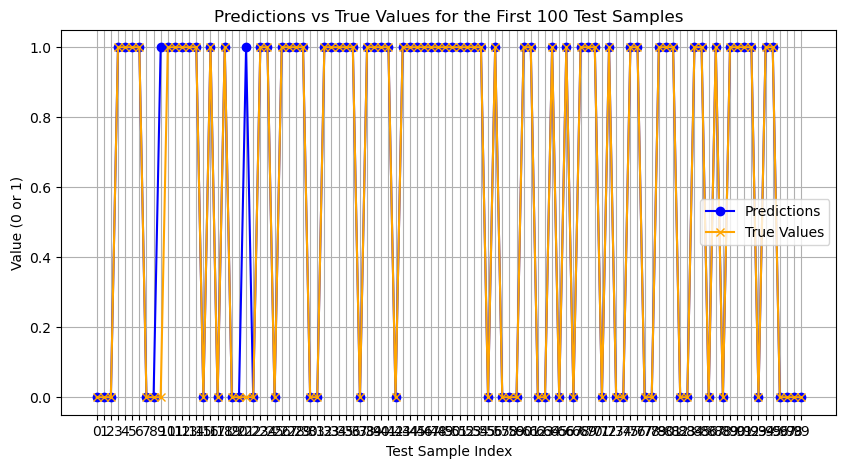

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(predictions[:100], marker='o', label='Predictions', color='blue')
plt.plot(y_test[:100], marker='x', label='True Values', color='orange')
plt.title('Predictions vs True Values for the First 100 Test Samples')
plt.xlabel('Test Sample Index')
plt.ylabel('Value (0 or 1)')
plt.xticks(range(100))
plt.grid(True)
plt.legend()
plt.show()

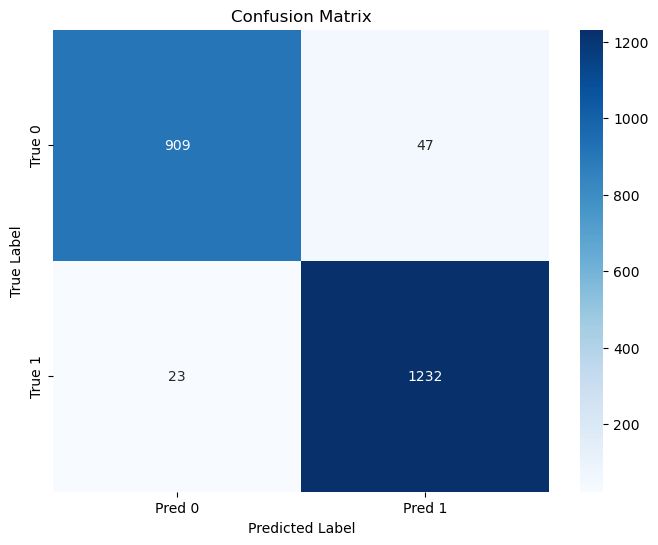

In [22]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [23]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       956
         1.0       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Confusion Matrix:
[[ 909   47]
 [  23 1232]]


In [45]:
ARENA_BLK_SIZE = 1024

# Function to convert some hex values into an array for C programming
def dump_tflite_hex(file_name, tflite_model, c_str):
    model_len = len(tflite_model)
    # Add array length at the top of the file
    c_str += '\nunsigned int ' + file_name + '_len = ' + str(model_len) + ';\n\n'

    c_str += '// Since the size is ' + str(model_len)
    c_str += ' for this model the Tensor arena size needs to be\n'
    c_str += '#define TENSOR_ARENA_SIZE '\
                + str(((model_len//ARENA_BLK_SIZE) + 1)//2) \
                + '*1024\n\n'

    # Declare C variable
    c_str += 'unsigned char ' + file_name + '[] = {'
    hex_array = []
    for i, val in enumerate(tflite_model):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formating so each line stays within 80 characters
        if (i + 1) < len(tflite_model):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    return c_str

In [46]:
# Function to convert some hex values into an array for C programming
import time, sys

def hex_to_c_array(tflite_model, file_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + file_name.upper() + '_H\n'
    c_str += "#define " + file_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Reethu RG Thota \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(tf.__version__) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", tf.__version__, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(50) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(32) + '\n*/\n'
    
# Generate 'C' constants for the no. of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(64) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(32) + ';\n'   
    c_str +=   'const int ' + 'DENSE3_SIZE' + ' = ' + str(1) + ';\n' 
    
    c_str = dump_tflite_hex(file_name, tflite_model, c_str)
    
# Close out header guard
    c_str += '#endif //' + file_name.upper() + '_H'
  
    return c_str

In [47]:
# Write TFLite model to a C source (or header) file
with open("phishing_detection_model_tflite" + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, "phishing_detection_model_tflite"))

This model data was generated on: Sun Nov  3 20:44:40 2024
Tools used: Python: 3.8.18 (default, Sep 11 2023, 08:25:43) 
[Clang 14.0.6 ] 
 Numpy: 1.23.5 
 TensorFlow: 2.12.0 
 Keras:  2.12.0 


